# PCA算法

#### 数据降维技术，用于数据预处理

1. 对原始数进行零均值化,对每个特征获取一个均值，newdata=mean-data
2. 求协方差矩阵 
3. 对协方差矩阵求特征值和特征向量 
4. 特征向量构成新的特征空间 

In [3]:
import numpy as np

In [11]:
aa=np.random.randint(1,10,size=((2,3)))
print(aa)
print(np.cov(aa,rowvar=0))
eigVals,eigVects=np.linalg.eig(np.mat(np.cov(aa,rowvar=0)))
print(eigVals)
print(abs(np.sort(-eigVals)))

[[1 7 5]
 [4 9 5]]
[[4.5 3.  0. ]
 [3.  2.  0. ]
 [0.  0.  0. ]]
[6.5 0.  0. ]
[0.  0.  6.5]


In [14]:
print(abs(np.sort(-eigVals)))

[6.5 0.  0. ]


In [64]:
class PCA(object):
    '''
    data:每一行代表一个样本，每一列代表一个特征 
    '''
    def __init__(self,n=2,n_index=None):
        self.n_=n#将数据降到多少维
        self.n_index=n_index
    def ZeroMean(self,data):
        meanVal=np.mean(data,axis=0)#列上求均值，各个特征求均值,得到的维度维特征的个数
        newdata=meanVal-data
        return newdata,meanVal
    def fit(self,data):
        #1.零均值化
        newdata,self.meanVal=self.ZeroMean(data)
        #2.求协方差矩阵
        conv=np.cov(newdata,rowvar=0)#rowvar=0表示每一行代表一个样本
        #3.求特征值和特征向量
        eigVals,eigVects=np.linalg.eig(np.mat(conv))
        #4.特征值进行排序选择
        index=np.argsort(eigVals)#从小到大索引
        self.n_index=index[-1:-(self.n_+1):-1]
        self.n_eigvects=eigVects[:,self.n_index]#以前的维度*新维度
        lowData=newdata*self.n_eigvects##低维特征空间的数据
        #recondata=(lowData*self.n_index.T)+self.meanVal#重构原始数据
        return lowData
    def transform(self,tr_data):
        z_data=self.meanVal-tr_data
        low_data=z_data*self.n_eigvects
        return low_data

In [65]:
pca=PCA(n=2)

In [17]:
train_data=np.random.randint(1,100,size=(10,5))
test_data=np.random.randint(1,100,size=(1,5))

In [66]:
low_data=pca.fit(train_data)
print(low_data)

[[ 42.00903012  21.58489897]
 [ 78.23840566   3.47984362]
 [-22.67147693 -44.35764242]
 [  2.90441108  18.79098394]
 [-16.7569616   62.23488274]
 [ -2.04792867 -30.1525481 ]
 [ -5.1844683    3.80842028]
 [ -1.75644278 -43.17410031]
 [ -2.84812121 -10.9296429 ]
 [-71.88644737  18.71490418]]


In [67]:
test_low=pca.transform(test_data)

In [68]:
test_low

matrix([[ 80.30940305, -15.5256718 ]])

In [30]:
from matplotlib import pyplot


In [52]:
print(pca.n_index)

[4 3]


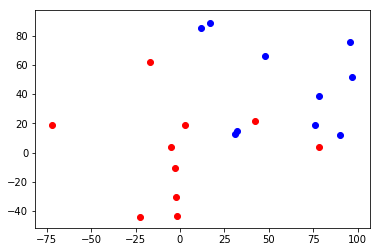

In [69]:
for data in low_data:
    data=np.array(data)[0]
    #print(data[0])
    pyplot.scatter(data[0],data[1],c='r')
for data in train_data:
    pyplot.scatter(data[4],data[3],c='b')
pyplot.show()

## sklearn 测试

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca=PCA(n_components=2)

In [57]:
y=pca.fit_transform(train_data)
y 

array([[ 42.00903012,  21.58489897],
       [ 78.23840566,   3.47984362],
       [-22.67147693, -44.35764242],
       [  2.90441108,  18.79098394],
       [-16.7569616 ,  62.23488274],
       [ -2.04792867, -30.1525481 ],
       [ -5.1844683 ,   3.80842028],
       [ -1.75644278, -43.17410031],
       [ -2.84812121, -10.9296429 ],
       [-71.88644737,  18.71490418]])

In [58]:
pca.transform(test_data)

array([[ 80.30940305, -15.5256718 ]])